# Chapter 1 exercises

In [18]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In [173]:
def run_ev_1d(fitness_function, population_size, boundaries, random_seed,
              n_births, initialization_bounds, pertubation_function):
    population = (
        initialization_bounds[1] - initialization_bounds[0]
    ) * np.random.rand(population_size) + initialization_bounds[0]
    fitness = list(map(fitness_function, population))
    
    maximum_over_births = [max(fitness)]
    max_x = [max(population)]
    
    for _ in range(n_births):
        x_parent = np.random.choice(population)
        x_new = pertubation_function(x=x_parent)
        x_new = min(max(x_new, boundaries[0]), boundaries[1])
        x_new_fitness = fitness_function(x_new)
        deletion_candidate_index = np.random.randint(low=0, high=len(population))

        if fitness[deletion_candidate_index] < x_new_fitness:
            fitness[deletion_candidate_index] = x_new_fitness
            population[deletion_candidate_index] = x_new
        
        maximum_over_births.append(max(fitness))
        max_x.append(population[np.argmax(fitness)])
    
    return maximum_over_births, max_x
        
def gaussian_pertubation(x, average_absolute_step):
    x_new = x + average_absolute_step / np.sqrt(2 / np.pi) * np.random.randn()
    return x_new

def plot(max_fitness, max_x, fitness_function):
    
    f, axs = plt.subplots(1, 3, figsize=(24, 6))
    axs[0].plot(max_fitness)
    axs[0].set_title('Max fitness')
    axs[1].plot(max_x)
    axs[1].set_title('x value for max fitness species')
    x = np.arange(-20, 20, 0.1)
    y = fitness_function(x)
    axs[2].plot(x, y)
    axs[2].set_title('Fitness function')

### x^3

In [176]:
fitness_function = lambda x: x**3

max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=200,
    initialization_bounds=[-10, 2],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=1)
)

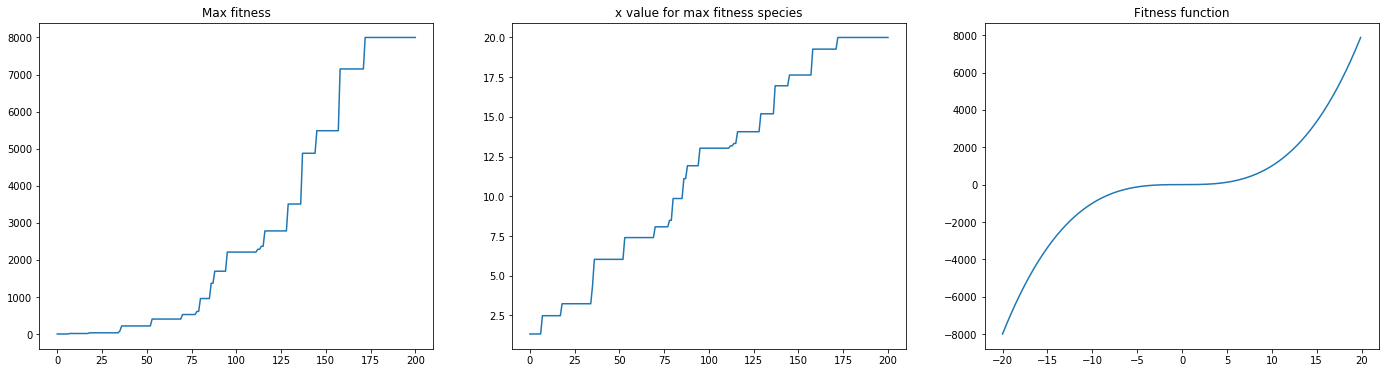

In [177]:
plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)

### x^3 + 10x^2

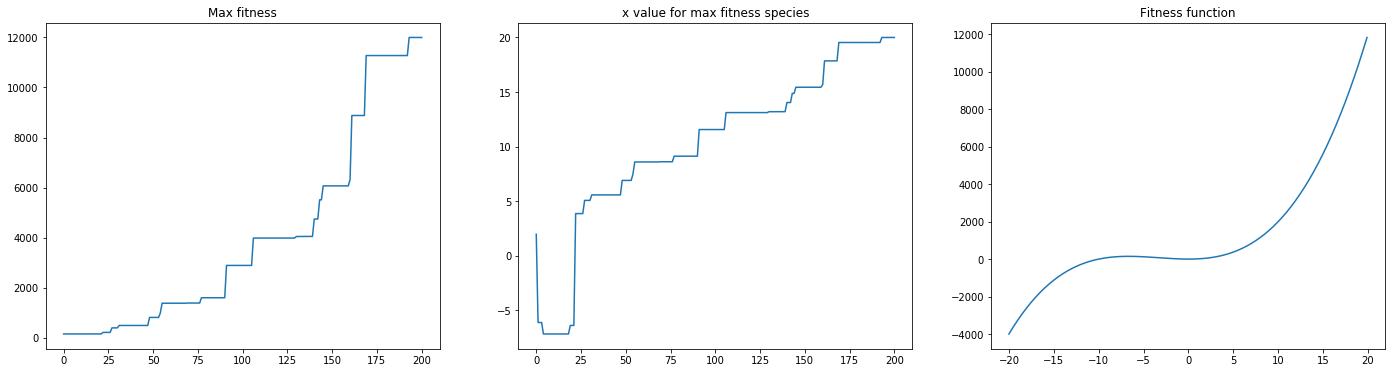

In [185]:
fitness_function = lambda x: x**3 + 10 * x**2

max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=200,
    initialization_bounds=[-10, 2],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=1)
)

plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)

Note that in the above run the local minima is avoided. Let's try again.

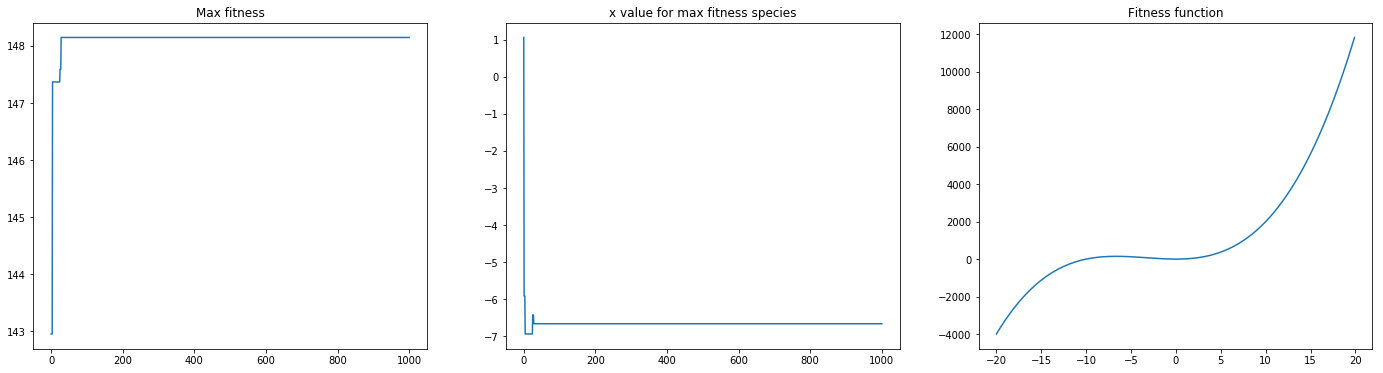

In [186]:
max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=1000,
    initialization_bounds=[-10, 2],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=1)
)

plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)

Here the local minima is not avoided.

### sin(x)

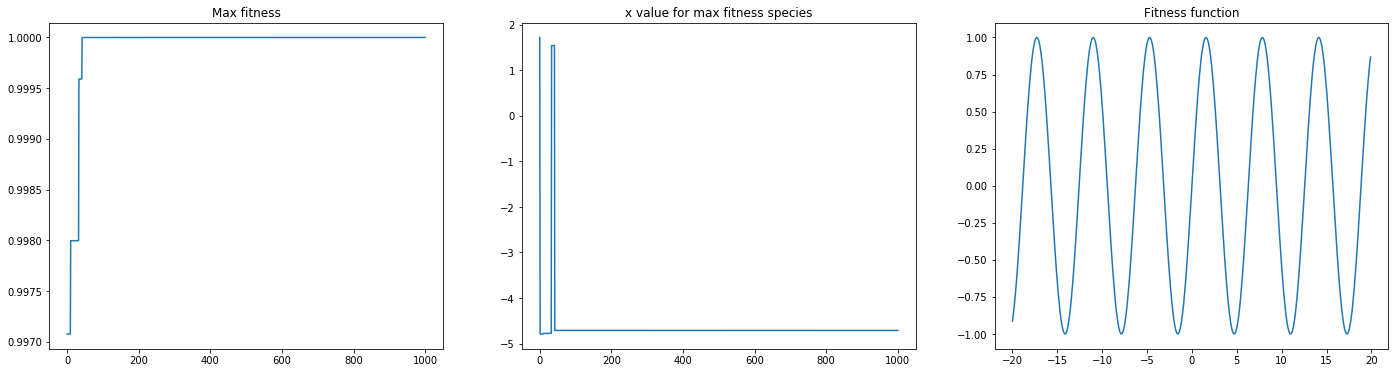

In [187]:
fitness_function = lambda x: np.sin(x)

max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=1000,
    initialization_bounds=[-10, 2],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=1)
)

plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)

### x * sin(x), with different step sizes

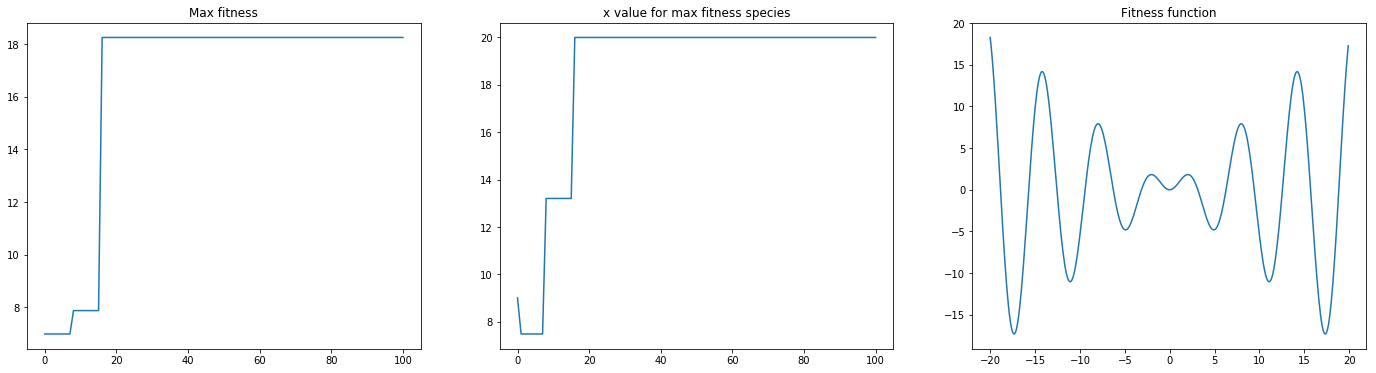

In [189]:
fitness_function = lambda x: x * np.sin(x)

max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=100,
    initialization_bounds=[-10, 10],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=5)
)

plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)

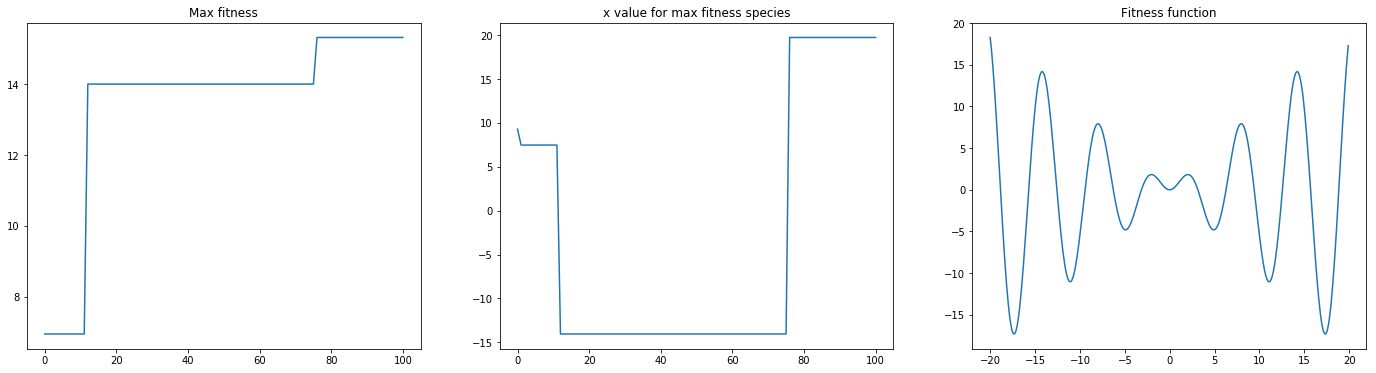

In [192]:
fitness_function = lambda x: x * np.sin(x)

max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=100,
    initialization_bounds=[-10, 10],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=2)
)

plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)

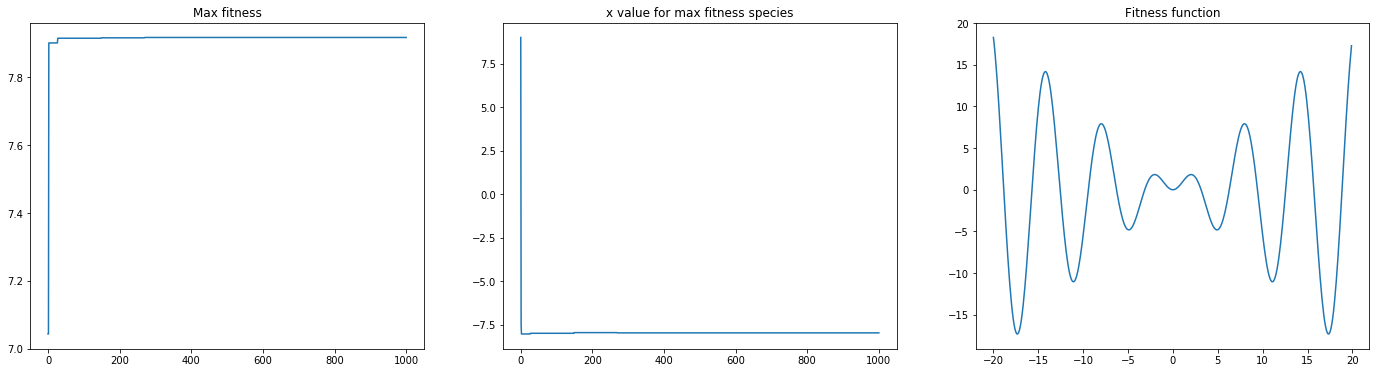

In [193]:
fitness_function = lambda x: x * np.sin(x)

max_fitness, max_x = run_ev_1d(
    fitness_function=fitness_function,
    population_size=10,
    boundaries=[-20, 20],
    random_seed=None,
    n_births=1000,
    initialization_bounds=[-10, 10],
    pertubation_function=partial(gaussian_pertubation, average_absolute_step=1)
)

plot(fitness_function=fitness_function, max_x=max_x, max_fitness=max_fitness)